# analytical solution :

given the following differential equation : 

$$\frac{dy}{dt} = y(t^2-1.1)$$

with the time domain as [0, 4] and the initial condition as $y(0) = 1$

for the analytical solution we can use the method of seperation of variables to transform the IVP to the following form :

$$\int_{1}^{f(t)} \frac{dy}{y} = \int_{0}^{t}(t^2-1.1)dt$$

$$ ln(f(t)) - ln(1) = \frac{t^3}{3} - 1.1t \rightarrow y = f(t) = e^{\frac{t^3}{3} - 1.1t}$$

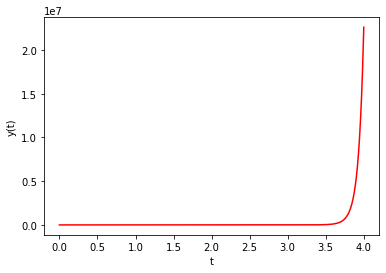

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,4,10000)

def f(t):
    a = (t**3)/3
    b = (1.1 * t)
    return np.exp(a-b)


plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t,f(t),'r',label='analytical')

# Euler Method :

In [2]:
from ode import forward_euler, RK4

In [3]:
def func_one(t,y):
    return y*((t**2)-1.1)

solver = forward_euler(0.25, 0, 4, 1, func_one)

t1, y1 = solver.solve()

In [4]:
for i in range(len(t1)):
    print(f"{t1[i]} - {y1[i]}\n")

0.0 - 1.0

0.25 - 0.725

0.5 - 0.5369531249999999

0.75 - 0.4228505859374999

1.0 - 0.3660300384521483

1.25 - 0.35687928749084463

1.5 - 0.3981434551069735

1.75 - 0.5126096984502284

2.0 - 0.7641088317523717

2.25 - 1.318087734772841

2.5 - 2.6238183970321867

2.75 - 6.001984583211128

3.0 - 15.698940925461606

3.25 - 46.70434925324828

3.5 - 157.18932545546375

3.75 - 595.354570162569

4.0 - 2524.675474095644



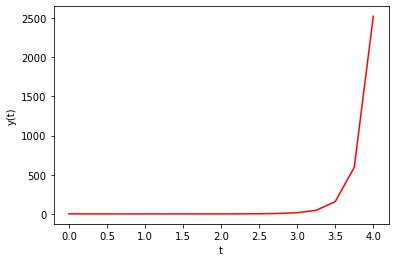

In [5]:
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t1,y1,'r',label='euler_scheme, h=0.25')

In [6]:
solver = forward_euler(0.125, 0, 4, 1, func_one)

t2, y2 = solver.solve()

In [7]:
for i in range(len(t1)):
    print(f"{t2[i]} - {y2[i]}\n")

0.0 - 1.0

0.125 - 0.8625

0.25 - 0.7455908203125

0.375 - 0.6488970108032227

0.5 - 0.571080064585805

0.625 - 0.5104028077235632

0.75 - 0.46514443375745035

0.875 - 0.43389254211437167

1.0 - 0.41575718976818504

1.125 - 0.41056022489608274

1.25 - 0.41906010455213444

1.375 - 0.4432870168465547

1.5 - 0.4870962415583431

1.625 - 0.5571163262823549

1.75 - 0.6644047438046989

1.875 - 0.8273915325192891

2.0 - 1.0772249913620275



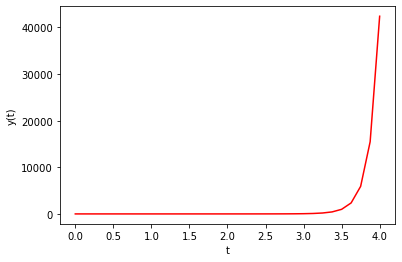

In [8]:
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t2, y2,'r',label='euler_scheme, h=0.125')

# RK Method :

In [9]:
solver = RK4(func_one)

t3, y3 = solver.solve([1],0.25,4)

In [10]:
t3

[0,
 0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75]

In [11]:
y3

[[0.7391054344468129,
  0.5679519517659597,
  0.47013683541936074,
  0.43184363822152066,
  0.45038567726700385,
  0.5422594222390369,
  0.7622766842269225,
  1.2603378196878041,
  2.462053708302067,
  5.697831422590246,
  15.645785235031713,
  51.022700713517935,
  197.73631639425736,
  911.201902173091,
  4995.97536610207,
  32615.65114943967]]

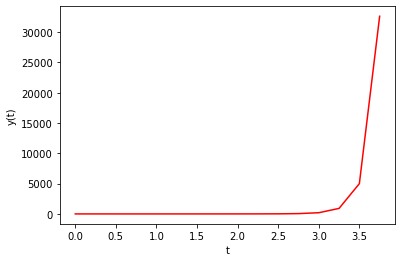

In [12]:
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t3,y3[0],'r',label='runge-kutta')

In [13]:
def irk4(f,t,y0):
    
    N = len(t)
    h = t[1]-t[0]
   
    
    y = np.zeros(N+1)
    y[0] = y0

    k1 = 0
    k2 = 0


    for n in range(1,N+1):    
        k1 = f(t[n-1]+(0.5+np.sqrt(3)/6)*h,y[n-1]+1/4*k1+(1/4+np.sqrt(3)/6)*h*k2)
        k2 = f(t[n-1]+(0.5-np.sqrt(3)/6)*h,y[n-1]+1/4*k2+(1/4-np.sqrt(3)/6)*h*k1);
        y[n] = y[n-1]+(h/2)*(k1+k2);

    return t, y


t4, y4 = irk4(func_one,t1,1)

In [14]:
t4

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ])

In [15]:
y4

array([1.00000000e+00, 7.28801193e-01, 6.36173639e-01, 5.45419693e-01,
       5.09805789e-01, 5.29524382e-01, 6.39387870e-01, 9.37864430e-01,
       1.72250849e+00, 3.99057673e+00, 1.15269228e+01, 4.06988763e+01,
       1.72122890e+02, 8.56399686e+02, 4.93608814e+03, 3.25197791e+04,
       2.42027348e+05, 2.01359158e+06])

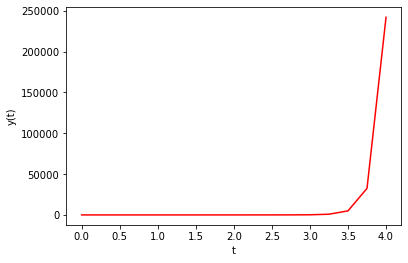

In [16]:
plt.ylabel('y(t)')
plt.xlabel('t')
plt.plot(t4,y4[:-1],'r',label='runge-kutta')

# combined plot :

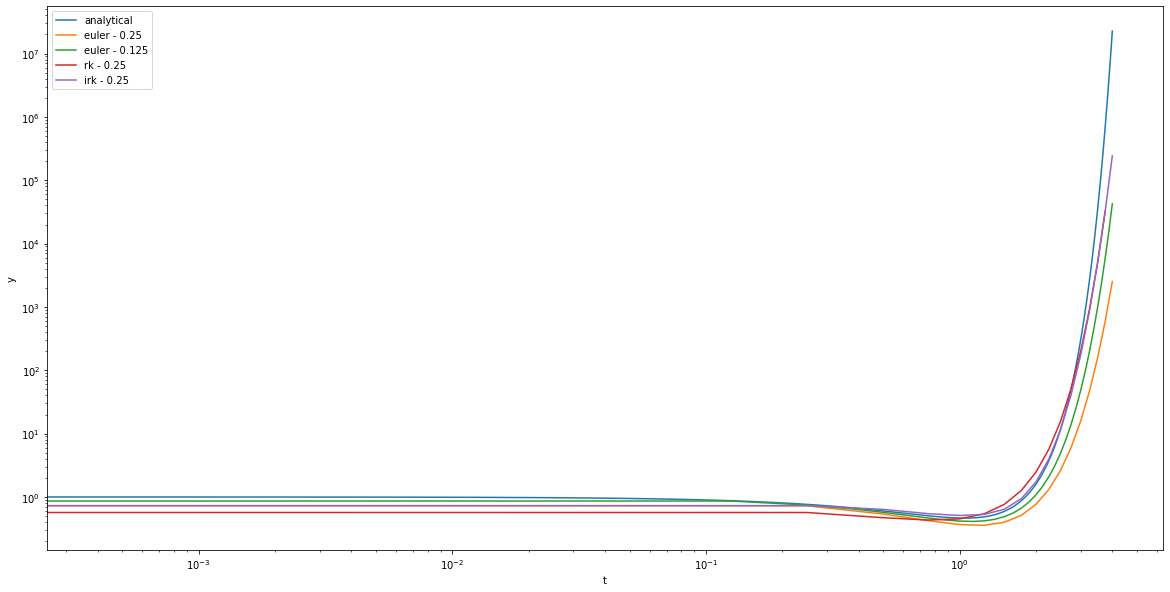

In [17]:
plt.figure(figsize=(20,10))
plt.xlabel('t')
plt.ylabel('y')

plt.yscale('log')
plt.xscale('log')

plt.plot(t, f(t), label='analytical')
plt.plot(t1, y1,label='euler - 0.25')
plt.plot(t2, y2,label='euler - 0.125')
plt.plot(t3, y3[0], label='rk - 0.25')
plt.plot(t4, y4[:-1], label='irk - 0.25')

plt.legend()

as we can see clearly from the figure the forward euler scheme for both steps 0.25 and 0.125 do not perform well and give the max error

the best approximation to the analytical solution is given by the implicit two stage runge-kutta method and the second best is the runge kutta fourth order method.